In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,  MinMaxScaler

import os # accessing directory structure
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
df=pd.read_csv('C:/Users/azegl/_ZHAWaufC/HSLU/prepared_creditcard.csv')
df_mix=pd.read_csv('C:/Users/azegl/_ZHAWaufC/HSLU/final_creditcard.csv')

In [14]:
df_mix.shape

(568630, 7)

In [15]:
def random_forest_training(train, y_train):
    #Trains a RandomForestClassifier and evaluates its performance.

    # Initialize RandomForestClassifier
    random_forest = RandomForestClassifier(random_state=42)

    # Lists to store training and validation metrics
    train_f1_scores = []
    val_f1_scores = []

    # Splitting the train set further into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(train, y_train, test_size=0.25, random_state=42, stratify=y_train)

    # Training the model
    random_forest.fit(x_train, y_train)

    # Training metrics
    train_predictions = random_forest.predict(x_train)
    train_f1 = f1_score(y_train, train_predictions)
    train_f1_scores.append(train_f1)

    # Validation metrics using the validation set
    val_predictions = random_forest.predict(x_val)
    val_f1 = f1_score(y_val, val_predictions)
    val_f1_scores.append(val_f1)

    return random_forest, train_f1_scores, val_f1_scores

def random_forest_visualization(train_f1_scores, val_f1_scores):
    #Visualizes training and validation F1-scores.

    print("Training F1-score:", train_f1_scores[0])
    print("Validation F1-score:", val_f1_scores[0])

    plt.figure(figsize=(10, 6))
    x = np.arange(1)  # Use np.arange to get a numerical x-value
    bar_width = 0.35
    plt.bar(x, train_f1_scores, width=bar_width, label='Train F1-score')
    plt.bar(x + bar_width, val_f1_scores, width=bar_width, label='Validation F1-score')
    plt.xlabel('Model')
    plt.ylabel('F1-score')
    plt.title('Training and Validation F1-score for RandomForest')
    plt.xticks(x + bar_width / 2, ['RandomForest'])
    plt.legend()
    plt.tight_layout()
    plt.show()

def random_forest_evaluation(random_forest, X_train, y_train, X_test, y_test):
    #Evaluates the RandomForest model on training and test datasets.

    # Metrics for the model on both training and test datasets
    train_predictions = random_forest.predict(X_train)
    test_predictions = random_forest.predict(X_test)

    # Calculating metrics
    train_f1 = f1_score(y_train, train_predictions)
    test_f1 = f1_score(y_test, test_predictions)

    # Calculate precision and recall
    precision_train = precision_score(y_train, train_predictions)
    recall_train = recall_score(y_train, train_predictions)

    precision_test = precision_score(y_test, test_predictions)
    recall_test = recall_score(y_test, test_predictions)

    # Output precision, recall, and f1 score
    print("RandomForest Model Metrics:")
    print(f"Training Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1-score: {train_f1:.4f}")
    print(f"Test Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1-score: {test_f1:.4f}")

    return train_predictions, test_predictions, train_f1, test_f1, precision_train, recall_train, precision_test, recall_test



Imbalanced data model (IDM)
Training F1-score: 1.0
Validation F1-score: 0.7977528089887641


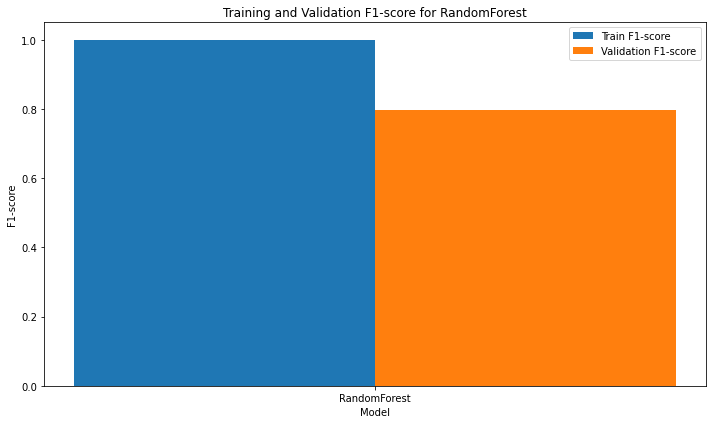

RandomForest Model Metrics:
Training Precision: 0.9786, Recall: 0.9289, F1-score: 0.9531
Test Precision: 0.9059, Recall: 0.7857, F1-score: 0.8415


(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 0.9531250000000001,
 0.8415300546448088,
 0.9786096256684492,
 0.9289340101522843,
 0.9058823529411765,
 0.7857142857142857)

In [20]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

random_forest_model, train_f1_scores, val_f1_scores = random_forest_training(X_train, y_train)
print("Imbalanced data model (IDM)")
random_forest_visualization(train_f1_scores, val_f1_scores)

random_forest_evaluation(random_forest_model, X_train, y_train, X_test, y_test)

Balanced data model (BDM)
Training F1-score: 0.9999970689700654
Validation F1-score: 0.9997361616801225


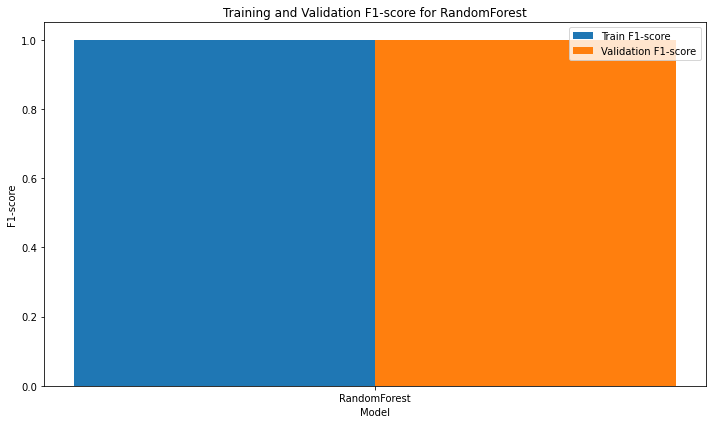

RandomForest Model Metrics:
Training Precision: 1.0000, Recall: 0.9999, F1-score: 0.9999
Test Precision: 0.9999, Recall: 0.9996, F1-score: 0.9998


(array([0, 0, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 1, 1], dtype=int64),
 0.9999318506077386,
 0.9997713481663881,
 0.999978015310138,
 0.9998856901675958,
 0.9999120446109733,
 0.9996306913106942)

In [19]:
# Separate features and target variable
X = df_mix.drop('Class', axis=1)
y = df_mix['Class']


# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

random_forest_model, train_f1_scores, val_f1_scores = random_forest_training(X_train, y_train)
print("Balanced data model (BDM)")
random_forest_visualization(train_f1_scores, val_f1_scores)

random_forest_evaluation(random_forest_model, X_train, y_train, X_test, y_test)